<a href="https://colab.research.google.com/github/jayuan101/LLMS-Comparing-Company-Chatbots/blob/main/LLMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime

In [2]:
data=pd.read_csv('LLMs.csv')
print(data.columns.tolist())

['name', 'owner', 'trained on x billion parameters', 'date', 'note / * = parameters undisclosed', 'link']


In [3]:
data

,name,owner,trained on x billion parameters,date,note / * = parameters undisclosed,link
0,BERT,Google,0.34,Oct 2018,NaN,https://en.wikipedia.org/wiki/BERT_(language_m...
1,GPT-2,OpenAI,1.50,Feb 2019,trained on Reddit only,https://en.wikipedia.org/wiki/GPT-2
2,T5,Google,11.00,Oct 2019,NaN,https://arxiv.org/abs/1910.10683
3,Megatron-11B,Meta / Facebook,11.00,Apr 2020,NaN,https://github.com/pytorch/fairseq/tree/main/e...
4,BlenderBot1,Meta / Facebook,9.40,Apr 2020,NaN,https://cobusgreyling.medium.com/meta-ais-blen...
...,...,...,...,...,...,...
75,Web LLM,Independent,7.00,Jun 2023,Browser-based LLM Chatbot,https://simonwillison.net/2023/Apr/16/web-llm/
76,OpenLLM,Independent,13.00,Jun 2023,NaN,https://huggingface.co/openlm-research/open_ll...
77,Ernie Bot 3.5,Baidu,200.00,July 2023,Surpassing ChatGPT (3.5) in comprehensive abil...,http://research.baidu.com/Blog/index-view?id=185
78,Claude 2,Anthropic,52.00,July 2023,"Expanded input and output length (up to 100,00...",https://arstechnica.com/information-technology...


In [4]:
data['date']=data['date'].apply(lambda x: datetime.strptime(x.replace('July','Jul'), "%b %Y"))
data=data.sort_values('date',ascending=False).reset_index(drop=True)
display(data)

,name,owner,trained on x billion parameters,date,note / * = parameters undisclosed,link
0,LLaMa2,Facebook,70.00,2023-07-01,Open source LLM comes in 3 parameter sizes - 7...,https://venturebeat.com/ai/facebook-parent-met...
1,Claude 2,Anthropic,52.00,2023-07-01,"Expanded input and output length (up to 100,00...",https://arstechnica.com/information-technology...
2,Ernie Bot 3.5,Baidu,200.00,2023-07-01,Surpassing ChatGPT (3.5) in comprehensive abil...,http://research.baidu.com/Blog/index-view?id=185
3,OpenLLM,Independent,13.00,2023-06-01,NaN,https://huggingface.co/openlm-research/open_ll...
4,Web LLM,Independent,7.00,2023-06-01,Browser-based LLM Chatbot,https://simonwillison.net/2023/Apr/16/web-llm/
...,...,...,...,...,...,...
75,BlenderBot1,Meta / Facebook,9.40,2020-04-01,NaN,https://cobusgreyling.medium.com/meta-ais-blen...
76,Megatron-11B,Meta / Facebook,11.00,2020-04-01,NaN,https://github.com/pytorch/fairseq/tree/main/e...
77,T5,Google,11.00,2019-10-01,NaN,https://arxiv.org/abs/1910.10683
78,GPT-2,OpenAI,1.50,2019-02-01,trained on Reddit only,https://en.wikipedia.org/wiki/GPT-2


In [5]:
owners=sorted(data['owner'].unique().tolist())
print(owners)

['AI21', 'Aleph Alpha', 'Alibaba', 'Amazon', 'Anthropic', 'Baidu', 'Beijing Academy of AI', 'Berkeley', 'BigScience', 'Bloomberg', 'Cerebras', 'Cohere', 'Databricks', 'DeepMind', 'EleutherAI', 'Facebook', 'Google', 'Google Deepmind', 'Huawei', 'Independent', 'LAION', 'LG', 'Meta', 'Meta / Facebook', 'Meta AI', 'Microsoft', 'Microsoft / OpenAI', 'Nomic', 'Open AI / Microsoft', 'Open Language Safety Research', 'OpenAI', 'Salesforce', 'Sber', 'SenseTime', 'Stability AI', 'Stanford', 'Technology Innovation Institute', 'Tsinghua & Zhipu', 'Vicuna Team', 'WeChat', 'Yandex']


In [6]:
for ow in owners:
    datai=data[data['owner']==ow]
    fig = px.bar(datai, x='name', y='trained on x billion parameters',title=ow)
    fig.show()

In [7]:
data.shape

(80, 6)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   name                               80 non-null     object        
 1   owner                              80 non-null     object        
 2   trained on x billion parameters    80 non-null     float64       
 3   date                               80 non-null     datetime64[ns]
 4   note / * = parameters undisclosed  34 non-null     object        
 5   link                               80 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 3.9+ KB


In [9]:
data.describe()

,trained on x billion parameters,date
count,80.000000,80
mean,187.431750,2022-05-13 21:18:00
min,0.340000,2018-10-01 00:00:00
25%,12.000000,2021-11-01 00:00:00
50%,65.000000,2022-08-01 00:00:00
75%,200.000000,2023-03-01 00:00:00
max,1750.000000,2023-07-01 00:00:00
std,309.427084,NaN


In [10]:
# Grouping owner's models
grouped_owners = data.groupby('owner')['name'].apply(', '.join).reset_index()
for index, row in grouped_owners.iterrows():
    print(f"{row['owner']} : {row['name']}")

AI21 : Jurassic-2*, Jurassic-1
Aleph Alpha : Luminous Supreme, Luminous
Alibaba : Tongyi Qianwen
Amazon : Titan, AlexaTM
Anthropic : Claude 2, Claude, RL-CAI
Baidu : Ernie Bot 3.5, Ernie 3.0 Titan, Ernie Bot, PLATO-XL
Beijing Academy of AI : Wu Dao 2.0
Berkeley : Koala-13B
BigScience : BLOOM
Bloomberg : BloombergGPT
Cerebras : Cerebras-GPT
Cohere : xlarge
Databricks : Dolly 2.0
DeepMind : Chinchilla
EleutherAI : GPT Neo, GPT-NeoX, GPT-J
Facebook : LLaMa2
Google : PaLM2, Bard*, MT5, Sparrow, PaLI, Minerva, PaLM, GLaM, BERT-480, BERT-200, FLAN, LaMDA, T5, BERT
Google Deepmind : Gopher
Huawei : PanGu-Sigma, PanGu-Alpha
Independent : OpenLLM, Web LLM
LAION : Hugging Chat
LG : Exaone
Meta : Atlas, InCoder
Meta / Facebook : LLaMa, Galactica, BlenderBot3, Megatron-Turing NLG, BlenderBot2.0, BlenderBot1, Megatron-11B
Meta AI : NLLB-200, OPT-IML
Microsoft : MT-NLG
Microsoft / OpenAI : BingChat*
Nomic : GPT4All-LoRA
Open AI / Microsoft : WebGPT
Open Language Safety Research : Sail-7B
OpenAI : GP

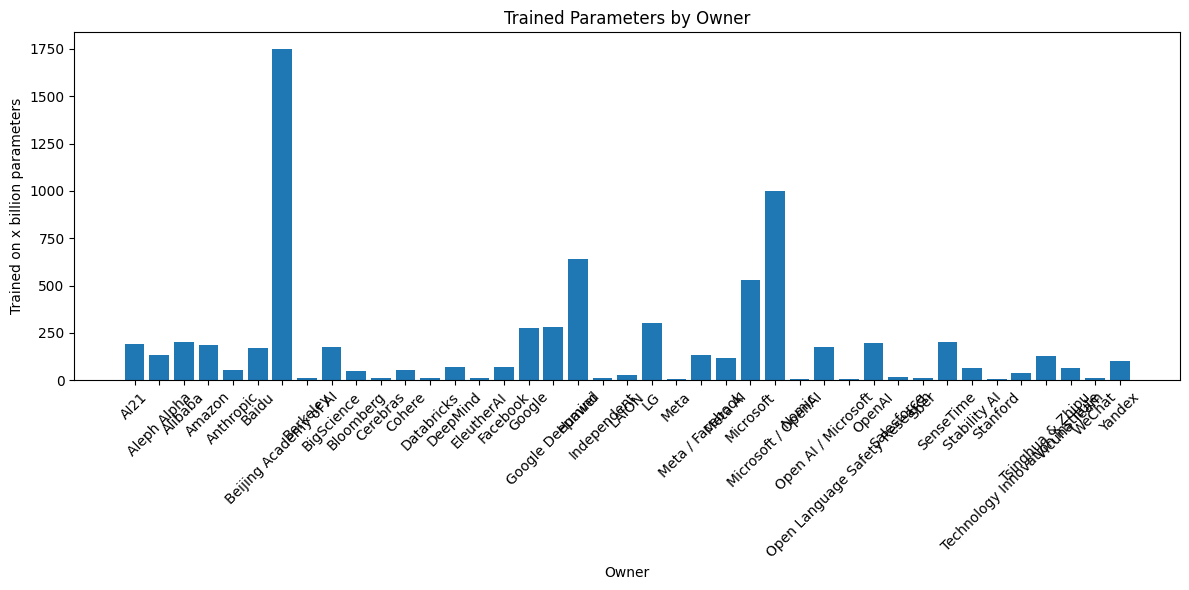

In [11]:
import matplotlib.pyplot as plt

grouped_data = data.groupby('owner')['trained on x billion parameters'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.bar(grouped_data['owner'], grouped_data['trained on x billion parameters'])
plt.xlabel('Owner')
plt.ylabel('Trained on x billion parameters')
plt.title('Trained Parameters by Owner')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()